<a href="https://colab.research.google.com/github/khanrasanju420/Airline_passenger_referral_prediction/blob/main/copy_of_sample_ml_submission_template_airline_passenger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Airline Passenger Referal Prediction



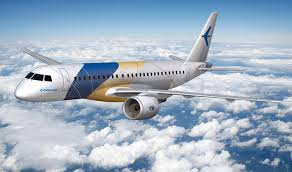

##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member** - SANJU KHANRA

# **Project Summary -**

Data includes airline reviews from 2006 to 2019 for popular airlines around the world with multiple choice and free text questions. Data is scraped in Spring 2019. The main objectives are to predict whether passengers will refer the airline to their friends.

We have Started with data loading and we have done EDA, feature engineering, data cleaning, target encoding feature selection and then model building.
So, we have used this models:
*	Logistic Regression Model
*	Decision Tree Model
*	Random Forest Model
*	Support Vector Machine Model
*	K-Nearest-Neighbour Model
*	Naïve Bayes

*	We performed hyperparameter tuning for decision tree models, random forest models, K-Nearest Neighbors, Support Vector Machines, and Naive Bayes using the GridSearch CV method. This is done to improve accuracy and avoid overfitting criteria. After that, we completed the Gradient Boosting model by fine-tuning the hyperparameters.
*	Based on an understanding of the business and problem use cases. The classification metrics for Recall are given first priority, Accuray second priority, and ROC AUC third priority.
*	We created classifier models using 6 different classifier types, all of which provided over 90% accuracy. We can conclude that LogisticRegression gives the best model.
*	Comparing the model evaluation metrics, we can see that the SVM is the most accurate model with a very small margin, and performs the best among the experimental models on the given dataset.
*	The most important features were overall rating and value for money, which helped the model predict whether passengers would recommend a particular airline to their friends.
*	The developed classifier models can be used to predict passenger recommendations as they enable airlines to identify influential passengers who can help generate more revenue.
*	Therefore, in order to grow or grow their business, our customers must provide outstanding cabin service, ground handling, entertaining food, beverages and comfortable seating.


# **GitHub Link -**

# **Problem Statement**


1. Which Traveller_type has more ratings?

2. Which type of Cabin has more recommendation?

3. Which type of traveller type is value for money?

4. What is distribution of average ratings of Food_bev and entertainment given by the passenger in every class?

5. Which cabin type has more recommended based on ground service ratings?

6.  Which cabin type has more recomended based on overall service ratings by customers?

7. Which airline made highest trips?

8. Which cabin type has more recomended based on overall service ratings by customers?

9. Comparison of all independent variable/features?

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import lightgbm
import warnings
warnings.filterwarnings('ignore')

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV,  cross_val_score

In [ ]:
# Importing all models from sklearn to be used in our model building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
import time
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Importing  metrics for evaluation for our models
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import recall_score,f1_score,roc_curve, roc_auc_score

In [ ]:
!pip install shap==0.40.0
import shap 
import graphviz
sns.set_style('darkgrid') 

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
airline_df1=pd.read_excel(r"/content/drive/My Drive/Colab Notebooks/Airline Passenger Referral Prediction/data_airline_reviews.xlsx")

### Dataset First View

In [ ]:
# Dataset First Look
airline_df1.head(5)

In [ ]:
airline_df1.tail(5)

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f"This dataset has {airline_df1.shape[0]} row and {airline_df1.shape[1]} columns")

we have 17 columns and 131895 rows in our data.

### Dataset Information

In [ ]:
# Dataset Info
airline_df1.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
airline_df1.duplicated().sum()

This dataset have 70711 duplicate values

In [ ]:
#Drop all Duplicate value from the Dataset
airline_df1.drop_duplicates(inplace=True)

In [ ]:
#Final check of Duplicate value
airline_df1.duplicated().sum()

In [ ]:
#New shape of dataset
airline_df1.shape

#### Missing Values/Null Values

In [ ]:
#copy the dataset
airline_df=airline_df1.copy()

In [ ]:
#print 1st 2row of dataset
airline_df.head(2)

In [ ]:
# Missing Values/Null Values Count
airline_df.isnull().sum()

In [ ]:
# Visualizing the missing values
airline_df.isnull().sum().plot(kind="bar")
plt.show()

### What did you know about your dataset?

Air transport or aviation plays a very important role in the present transport structure of the world and surely it is considered the gift of the twentieth century to the world. In today’s fast-paced world, air transport has been a blessing to all because of its speed of transportation. This mode of transport is very useful to get the products with short delivery times quickly and safely to those who require it also allows the tourism industry in each country to have stable growth by shortening the distance among all the people who inhabit the world. Here, I have a dataset regarding the ratings of services provided by different airlines to customers. The main objective of this project is to understand how likely the passengers will recommend the airlines to others. The dataset here is quite large which initially had 131895 rows and 17 columns. On checking the data information, it was derived that there were basically two different types of data in the dataset there are 7 columns of floats64, data types 10 columns with object types. Coming to the null values and missing values in the dataset, it was observed that there was a mismatch in the non-null counts which clearly stated that a large number of missing and null values were present in the dataset.

Data is scrapped in the Spring of 2019 from the Skytrax website. Data includes airline reviews from 2006 to 2019 for popular airlines around the world with multiple-choice and free-text questions. The main objective is to predict whether passengers will refer the airline to them or not.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
airline_df.columns

In [ ]:
# Dataset Describe
airline_df.describe().T

### Variables Description 

**Feature descriptions briefly as follows:**

1. airline: Name of the airline.

2. overall: Overall point is given to the trip between 1 to 10.

3. author: Author of the trip

4. review date: Date of the Review

5. customer review:Review of the customers in free text format

6. aircraft: Type of the aircraft

7. traveller type: Type of traveler (e.g. business, leisure)

8. cabin: Cabin at the flight date flown: Flight date

9. seat comfort: Rated between 1-5

10. cabin service: Rated between 1-5

11. foodbev: Rated between 1-5

12. entertainment: Rated between 1-5

13. ground service: Rated between 1-5

14. value for money: Rated between 1-5

15. recommended: Binary, target variable.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
airline_df.nunique()

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
def missing_value(df):
    percentage_missing=airline_df.isnull().sum()*100/len(airline_df)
    missing_value_df=pd.DataFrame({"column_name":airline_df.columns,"percentage_missing":percentage_missing})
    return missing_value_df.sort_values("percentage_missing",ascending=False)

In [ ]:
#Checking Percentage wise missing values.
missing_value(airline_df)

In [ ]:
#Showing the unique aircraft names
airline_df.aircraft.unique()

In [ ]:
#checking the number of unique aircrafts
airline_df.aircraft.nunique()

Droping the aircraft column from data as it have highest null values.

In [ ]:
#drop aircraft column
airline_df = airline_df.drop(['aircraft'],axis = 1)

In [ ]:
#droping the columns from data which are not for our use
airline_df = airline_df.drop(['author','review_date','route','date_flown','customer_review'],axis = 1)
airline_df.head()

In [ ]:
#Splitting the Numeric column
low_null = ['overall','seat_comfort','cabin_service','value_for_money']
high_null = ['food_bev','entertainment','ground_service']

In [ ]:
#Imputation technique using Quantile-1 value
def impute_by_q1_values(df,column):
  Q1=np.percentile(np.sort(df[column].dropna()),25)
  df[column].fillna(Q1,inplace=True)

In [ ]:
#Looping the null value column
for col in low_null:
  impute_by_q1_values(airline_df,col)

Imputed null values by Quantile-1 for the columns have low null value percentage.

In [ ]:
#Imputation technique using Median Imputation
def median_imputation(df,column):
  df[column].fillna(df[column].median(),inplace=True)

In [ ]:
#Looping the null value column
for col in high_null:
  median_imputation(airline_df,col)

Imputed null values by Median Imputaion for the columns have high percetage.

In [ ]:
#after imputed null values
airline_df.head(5)

In [ ]:
#Remove recommended null value row
airline_df.dropna(subset=['recommended'],inplace=True)

In [ ]:
#replaces the NULL values with the value from the previous row
airline_df['traveller_type'].fillna(method="ffill",inplace=True)

In [ ]:
 ##replaces the NULL values with mode
 airline_df['cabin'].fillna(airline_df['cabin'].mode().values[0],inplace=True)

Filling traveller_type column with Mode Imputation

cabin column with Forward fill method.

In [ ]:
airline_df.head(5)

In [ ]:
#Checking the new null value percentage
missing_value(airline_df)

In [ ]:
#shape of dataset
airline_df.shape

It is better to work with clean data for prediction rather than huge corrupt data

### What all manipulations have you done and insights you found?

**Reason of droping columns--**

1. Author - Being the categorical with high Variability not required for prediction.
2. Route - Not needed for building a model as it is independent of the Services and Quality of travel.
3. Date_flown - Not needed for building a model as it is not a time series data, also some common time period is there between 2 dates.
4. Review_date - Similar to Date_flown
5. Customer_review - As it is related to overall review feature of the datasets.
On the basis of null value percentage we divide our data in two parts-

high_null = columns which have high percentage of null values.


low_null = columns which have low percentage of null values

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart -1 Which Traveller_type has more ratings?

In [ ]:
airline_df.head(2)

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(10,5))
sns.countplot(x=airline_df['traveller_type'])
plt.show()

##### 1. Why did you pick the specific chart?

I picked this specific chart for check that which traveller_type has more ratings

##### 2. What is/are the insight(s) found from the chart?

**From above plot**

Travelling type of Solo Leisure has more ratings

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* In the airplane most of the traveler are solo Leisure followed by Couple Leisure,Business and Famaly Leisure.We should focus on Famaily Leisre so that more famaily memeber travel together in the flight. 

#### Chart - 2 Which type of Cabin has more recommendation?

In [ ]:
airline_df.head(2)

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(10,5))
sns.countplot(x=airline_df['cabin'],hue=airline_df['recommended'])
plt.show()

##### 1. Why did you pick the specific chart?

I pick this specific chart for check which type of Cabin has more recommendation from coustomer.

##### 2. What is/are the insight(s) found from the chart?

**On the basis of above graph -**

1. Economy class has highest recommendation with bad reviews.

2. Business class has second most recommended cabin type with good reviews.

3. premium economy has equal reviews.

4. first class is least recommend cabin type with good reviews.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* Here we can see that most of the traveler travel in the Economy Class and very less taveler travel in the Premium and First class.


* In the Business class about 50% of traveler are not recommended to the other traveler and also same as First class for that reason we should make some effort in business for more recommendation by traveler.


* In the Economy class about 30% pessengers are not recommended the other so this is also a drawback of business. 

#### Chart - 3 Which type of traveller type is value for money?

In [ ]:
airline_df.head(2)

In [ ]:
# Chart - 3 visualization code
airline_df.groupby("traveller_type")['value_for_money'].mean().plot(kind="bar",color=('r',"b"),figsize=(10,6))
plt.show()

##### 1. Why did you pick the specific chart?

I chose this chart for show that Which type of traveller type is value for money for coustomer.

##### 2. What is/are the insight(s) found from the chart?

**From above plot**

We can say thet travelling Type of Solo Leisure worth of Money compare to other type of travelling.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Solo Leisure traveling type gives best rating in value for money section compare to other type of traveling. this is a positive sign of business. 

#### Chart - 4 What is distribution of average ratings of Food_bev and entertainment given by the passenger in every class?

In [ ]:
airline_df.head(2)

In [ ]:
# Chart - 4 visualization code
airline_df.groupby("cabin")["food_bev",'entertainment'].mean().plot(kind="bar",figsize=(10,6))
plt.show()

##### 1. Why did you pick the specific chart?

I picked this specific chart for show that the distribution of average ratings of Food_bev and entertainment given by the passenger in every class.

##### 2. What is/are the insight(s) found from the chart?

**From above plot**


1. In Businss Class the average ratings of Food_bev and entertainment given by passenger is highest.


2. In Economy Class the average ratings of Food_bev and entertainment given by passenger is lowest.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

In Economy Class the average ratings of Food_bev and entertainment given by passenger is lowest thats why we need to improve airplain's Food_bev and entertainment in Economy section.

#### Chart - 5 Which cabin type has more recomended based on ground service ratings?

In [ ]:
airline_df.head(2)

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(10,5))
sns.boxplot(x=airline_df['cabin'],y=airline_df['cabin_service'],hue= airline_df['recommended'], palette= ['blue','red'])
plt.show()

##### 1. Why did you pick the specific chart?

 I pick the specific graph to check which cabin type has more recomended based on ground service ratings.

##### 2. What is/are the insight(s) found from the chart?

**From above plot its showed that**

1. First class travellers are least likely to recommend the airlines.

2. Recommendation is most probable when the cabin service is given star rating greater then 4.

3. In economy class if we got ratings between 4 to 5 that means airlines recommended.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* from the insight we come to conclution that we should focus on cabin service improvement because it has direct relation with recommendation.

* Improve First class traveler service for more recommendation.

#### Chart - 6 Which cabin type has more recomended based on overall service ratings by customers?

In [ ]:
airline_df.head(2)

In [ ]:
for i in range(1,11):
  x= airline_df[airline_df['overall']==i]['recommended'].value_counts()
  print(f"when overall rating= {i}\n",x)

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(10,5))
sns.boxplot(x=airline_df['cabin'],y=airline_df['overall'],hue= airline_df['recommended'], palette= ['blue','red'])
plt.show()

##### 1. Why did you pick the specific chart?

I picked this specific chart for show that which cabin type has more recomended based on overall service ratings by customers.

##### 2. What is/are the insight(s) found from the chart?

**From above plot**
1. If the trip is rated above 8 for overall section, the trip is most likely be recommended by the travellers.

2. If it is below 3 , the unhappy travellers has not referred the airlines to their friends irrespective of their cabin type.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* When travelers give more than 8 rating they recommended the others so from this insight we can say that we need to improve overall experience of the traveler for more recommendation.

#### Chart - 7 .Which airline made highest trips?

In [ ]:
airline_df.head(2)

In [ ]:
sns.countplot(data=airline_df,x='airline',hue='recommended')

In [ ]:
# Chart - 7 visualization code
airline_df['airline'].value_counts()[:10].plot(kind='bar',figsize=(10,5),color='red')
plt.show()

##### 1. Why did you pick the specific chart?

I pick this chart for observed that which airline made highest trips?

##### 2. What is/are the insight(s) found from the chart?


**From the above plot we have observed that the top 10 airlines with most trips are-**

1. Spirit Airlines

2. American Airlines

3. United Airlines

4. British Airways

5. Emirates

6. china southern airline

7. frontier airlines

8. ryanair

9. delta air lines

10. turkish airlines

#### Chart - 8 Which cabin type has more recomended based on overall service ratings by customers?

In [ ]:
airline_df.head(2)

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(10,5))
sns.boxplot(x=airline_df['cabin'],y=airline_df['seat_comfort'],hue= airline_df['recommended'], palette= ['blue','red'])
plt.show()

##### 1. Why did you pick the specific chart?

I picked this specific chart for show that which cabin type has more recomended based on seat comfort ratings by customers.

##### 2. What is/are the insight(s) found from the chart?

**From above plot**
1. If the trip is rated above 3 for seat comfort section, the trip is most likely be recommended by the travellers in Economy class but in Business class,Premium Class or First class 

2. If the trip is rated above 4 for seat comfort section, the trip is most likely be recommended by the travellersin Business class, Premium Class and theFirst class.

3. If it is below 3 , the unhappy travellers has not referred the airlines to their friends irrespective of their cabin type and in the First class section it is below 4.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* When traveler give more than 4 rating in seat comfort section they mostly recommended the others so that from this insight we can say that we need to improve seat comfort of the traveler for more recommendation.

* In Business, First and Premium class is positively relate with traveller recommendation. When they give more than 4 rating chances of recommendation goes high.This is the sign of positive growth in business

#### Chart - 9 Comparison of all independent variable/features?

In [ ]:
airline_df.head(2)

In [ ]:
# Chart - 9 visualization code
#frequency distribution using histgram
airline_df.hist(bins=50, figsize=(20,15),color = 'blue')
plt.show()

##### 1. Why did you pick the specific chart?

For compare of all independent variable/features in the dataset

##### 2. What is/are the insight(s) found from the chart?

**From above plot**

1. The overall feature ratings of 1 to 2 occur more frequently.

2. From Seat comfort feature, We can say that rating of 1 is highest and rating of 4 is the second highest.

3. From cabin service feature, We can say that rating of 5 is highest and rating of 1 is the second highest.

4. The food bev feature ratings of 2,4 and 5 are varies equally.Which means their frequency are approximately equal.

5. The features of both the entertainment & ground service, We can say that ratings of 3 is highest and ratings of 1 is the second highest.

6. From value for money feature, It clearly shows that most of the passenger gives ratings of 1 as highest. From this we can say that most of the airline does not provide good service to passenger.

#### Chart - 10 - Correlation Heatmap

In [ ]:
airline_df.head(2)

Converting target as categorical data into numerical data: 'Label Encoding'

In [ ]:
#converting targeted column
airline_df['recommended'].replace({'yes':1,'no':0},inplace=True)

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(8,6))
sns.heatmap(airline_df.corr(), annot=True)
plt.show()

##### 1. Why did you pick the specific chart?

Correlation heatmaps can be used to find potential relationships between variables and to understand the strength of these relationships.

##### 2. What is/are the insight(s) found from the chart?

**We can infer the following from the above correlation heatmap -**

1. Value for money and overall are highly correlated to each other.

2. overall and recommended are highly correlated to each other. 

3. cabin service and value for money is highly correlated with recommended.

4. seat comfort and cabin service are very correlated to value for money.

5. value for money and recommended are highly correlated to each other.

6. Entertainment and ground service are very low correlated to each other.

7. Entertainment and recommended are low correlated to each other.

#### Chart - 11 - Pair Plot 

In [ ]:
airline_df.head(2)

In [ ]:
# Pair Plot visualization code
fig = plt.figure(figsize=(15, 8))
sns.pairplot(airline_df)
plt.show()

##### 1. Why did you pick the specific chart?

to understand the best set of features to explain a relationship between two variables or to form the most separated clusters

##### 2. What is/are the insight(s) found from the chart?

In here the pairplot is not helpfull for analysis.

## ***6. Feature Engineering & Data Pre-processing***

### 1.Checking multicollinearity between variables

In [ ]:
airline_df.head(2)

In [ ]:
#drop object value column
airline_df_num=airline_df.drop(['airline','traveller_type','cabin'],axis=1)

In [ ]:
airline_df_num.head(2)

In [ ]:
# calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = airline_df_num.columns
vif_data["VIF"] = [variance_inflation_factor(airline_df_num.values, i) for i in range (len(airline_df_num.columns))]
  
print(vif_data)

#### What multicollinearity techniques have you used and why did you use those techniques?

Here I use VIF for detect multicollinearity betwwn variable.

The variance inflation factor (VIF) directly measures the ratio of the variance of the entire model to the variance of a model with only the feature in question.

In layman’s terms, it gauges how much a feature’s inclusion contributes to the overall variance of the coefficients of the features in the model.

A VIF of 1 indicates that the feature has no correlation with any of the other features.

Typically, a VIF value exceeding 5 or 10 is deemed to be too high. Any feature with such VIF values is likely to be contributing to multicollinearity.

### 2. Feature  Selection

In [ ]:
# Drop overall column
airline_df.drop(["overall"], axis = 1, inplace = True)

In [ ]:
# Drop airline column
airline_df.drop(["airline"], axis = 1, inplace = True)

##### What all feature selection methods have you used  and why?

* Here we Drop overall column as it has highest correlation value than others.


* Here we are dropping airline column from our data as it is no usecase further

### 3. Handling Outliers

In [ ]:
airline_df.info()

In [ ]:
# Handling Outliers & Outlier treatments
# draw boxplot of numeric values of the dataset
plt.figure(figsize=(18, 18))
for i, col in enumerate(airline_df.select_dtypes(include=["float",'int']).columns):
    ax = plt.subplot(3,3, i+1)
    sns.boxplot(data=airline_df, x=col, ax=ax,color='r')
plt.suptitle('Box Plot of continuous variables')
plt.tight_layout()

##### What all outlier treatment techniques have you used and why did you use those techniques?

As we can see above there are no outliers presents

### 4. Categorical Encoding

In [ ]:
# Encode your categorical columns
categorical_features=list(airline_df.select_dtypes(['object']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

In [ ]:
#separating the dependent and independent variables
y = airline_df['recommended']
x = airline_df.drop(columns = 'recommended')

In [ ]:
x.columns

In [ ]:
def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    x = one_hot_encoding(x, col)
x.head()  

In [ ]:
x.shape

In [ ]:
print("The Percentage of No labels of Target Variable is",np.round(y.value_counts()[0]/len(y)*100))
print("The Percentage of Yes labels of Target Variable is",np.round(y.value_counts()[1]/len(y)*100))

**The Percentage of both labels('yes','no) is approximately equal. So no need of Handling Class Imbalance technique**

#### What all categorical encoding techniques have you used & why did you use those techniques?

***In here I used OdinalEncoder on the dataset***

* OdinalEncoder is used when the variables in the data are ordinal, ordinal encoding converts each label into integer values and the encoded data represents the sequence of labels.

* In One-Hot Encoding, each category of any categorical variable gets a new variable. It maps each category with binary numbers (0 or 1). This type of encoding is used when the data is nominal. Newly created binary features can be considered dummy variables. After one hot encoding, the number of dummy variables depends on the number of categories presented in the data.

### 5. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
#train and test split
x_train, x_test, y_train, y_test = train_test_split( x,y , test_size = 0.2, random_state = 42)

In [ ]:
#shape of y_train and y_test data
print(y_train.shape)
print(y_test.shape)

In [ ]:
#shape of x_train and x_test data
print(x_train.shape)
print(x_test.shape)

##### What data splitting ratio have you used and why? 

The foregoing data splitting methods can be implemented once we specify a splitting ratio. A commonly used ratio is 80:20, which means 80% of the data is for training and 20% for testing which I did in here. Other ratios such as 70:30, 60:40, and even 50:50 are also used in practice. There does not seem to be clear guidance on what ratio is best or optimal for a given dataset. The 80:20 split draws its justification from the well-known Pareto principle, but that is again just a thumb rule used by practitioners.

## ***7. ML Model Implementation***

### ML Model - 1 Fitting Logistic Regression

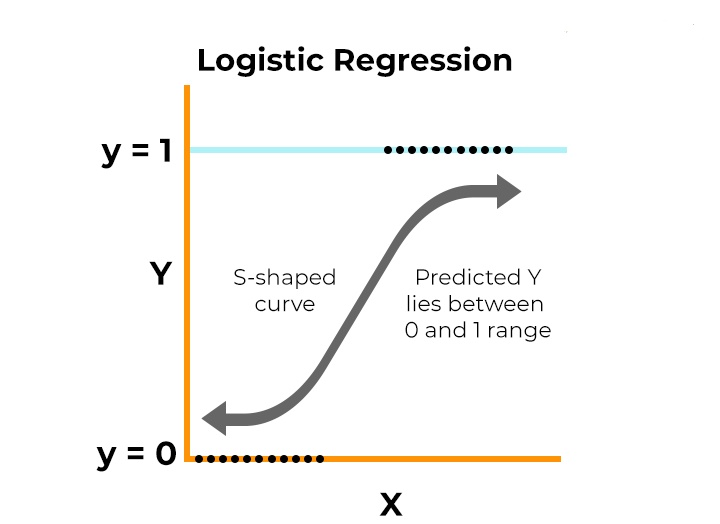

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model
#logistic regression fitting 
log_reg = LogisticRegression(fit_intercept=True, max_iter=10000)
log_reg.fit(x_train, y_train)


In [ ]:
log_reg.coef_

In [ ]:
log_reg.intercept_

In [ ]:
log_reg.score(x_train,y_train)

In [ ]:
log_reg.score(x_test,y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Get the predicted probabilities
train_preds = log_reg.predict_proba(x_train)
test_preds = log_reg.predict_proba(x_test)

In [ ]:
test_preds

In [ ]:
train_preds = log_reg.predict_proba(x_train)[:,1]
test_preds =log_reg.predict_proba(x_test)[:,1]

In [ ]:
test_preds

In [ ]:
# Get the predicted classes
train_class_preds = log_reg.predict(x_train)
test_class_preds = log_reg.predict(x_test)

In [ ]:
train_class_preds

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

In [ ]:
# Get the confusion matrix for both train and test
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [ ]:
# Get the confusion matrix for both train and test
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
logistic = LogisticRegression()

In [ ]:
#import libery
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [ ]:
scoring = ['accuracy']

In [ ]:
scoring = ['accuracy']
scores = cross_validate(logistic,x_train, y_train, scoring = scoring, cv =10, return_train_score=True,return_estimator=True,verbose = 10)

In [ ]:
scores['train_accuracy']

In [ ]:
scores['test_accuracy']

In [ ]:
scores['estimator']

In [ ]:
for model in scores['estimator']:
    print(model.coef_)

#####Hyperparameter Tuning

In [ ]:
logModel = LogisticRegression()

In [ ]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(1, 5, 10),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [1000,2500, 5000,10000]
    }
]

In [ ]:
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [ ]:
best_clf = clf.fit(x,y)

In [ ]:
best_clf.best_estimator_

In [ ]:
print (f'Accuracy - : {best_clf.score(x,y):.3f}')

##### Which hyperparameter optimization technique have you used and why?

Here we use GridSearchCV Hyperparameter optimization technique for better accuracy score


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Ater hyperparameter optimization we not find any improvement in accuracy.

### ML Model - 2 Fitting Decision Tree Classifier

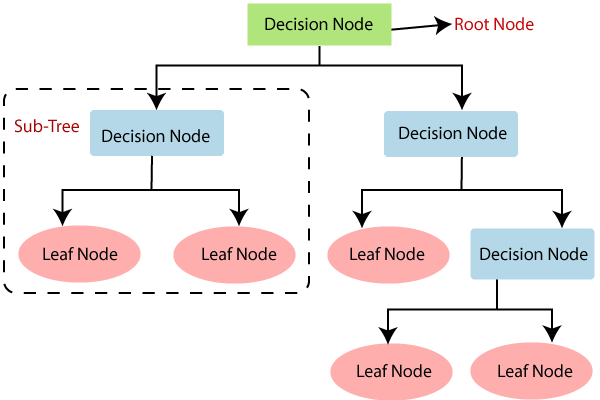

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#Initializing Decision Tree Model object
decision_classify=DecisionTreeClassifier()

In [ ]:
#Taining a model with x and y
decision_classify.fit(x_train,y_train)

In [ ]:
decision_classify.score(x_train,y_train)

In [ ]:
decision_classify.score(x_test,y_test)

In [ ]:
# Visualizing evaluation Metric Score chart
y_pred = decision_classify.predict(x_test)

In [ ]:
#report of decision tree 
report_dec_tree = classification_report(y_test, y_pred)
print(report_dec_tree)
dm = confusion_matrix(y_test, y_pred)
sns.heatmap(dm,annot=True)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
#setting the parameters and scoring metric
parameters = {"criterion":["gini","entropy"],"max_depth":[5,7],"min_samples_split":[5,7],"min_samples_leaf":[2,3]}
scoring_=['f1','recall','precision','accuracy']

In [ ]:
#performing hyperparameter tuning using gridsearchcv

#setting an estimator,and crossvalidation
tree_cv = GridSearchCV(estimator=decision_classify, param_grid=parameters, scoring=scoring_, cv=5,refit='accuracy')

#Fitting x and y to gridsearchcv model using an estimator Decision tree classifier
tree_cv.fit(x_train, y_train)

In [ ]:
#calling an best params
tree_cv.best_params_

In [ ]:
#calling an best score
tree_cv.best_score_

##### Which hyperparameter optimization technique have you used and why?

**Here our model is Overfitted. So Hyperparameter tuning is done to prune a Decision tree to preserve Generalized Model.**

* GridSearchCV is the process of performing hyperparameter tuning in order to determine the optimal values for a given model. As mentioned above, the performance of a model significantly depends on the value of hyperparameters. Note that there is no way to know in advance the best values for hyperparameters so ideally, we need to try all possible values to know the optimal values. Doing this manually could take a considerable amount of time and resources and thus we use GridSearchCV to automate the tuning of hyperparameters.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

***94% accuracy of Decision Tree with the help of hypermatring tunning.***

### ML Model - 3 Fitting Random Forest

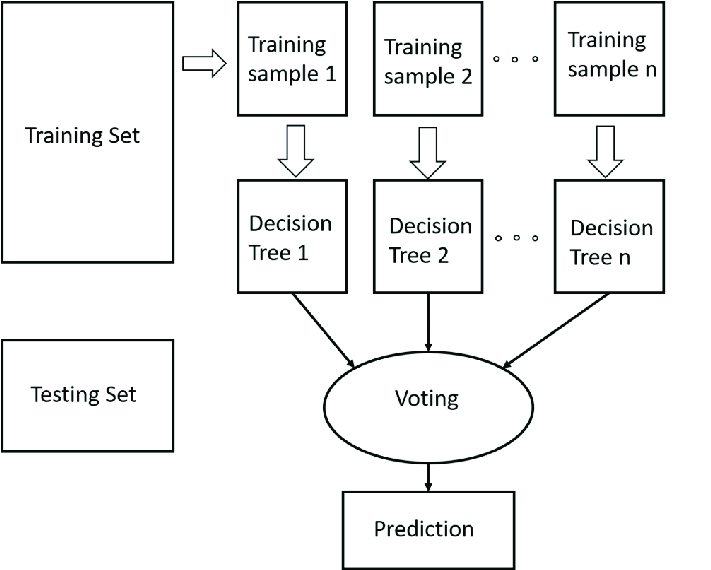

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model
random_forest = RandomForestClassifier()
random_forest.fit(x_train,y_train)

In [ ]:
random_forest.score(x_test,y_test)

92% accuracy with Random Forest

In [ ]:
#report of decision tree 
report_ran_forest = classification_report(y_test, y_pred)
print(report_ran_forest)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
random_forest_gridcv = GridSearchCV(estimator=random_forest,
                       param_grid = parameters,
                       cv = 5, verbose=2)

In [ ]:
random_forest_gridcv.fit(x_train,y_train)

In [ ]:
random_forest_gridcv.best_params_

In [ ]:
#calling an best score
random_forest_gridcv.best_score_

##### Which hyperparameter optimization technique have you used and why?

Here we used GridSearchCv for improve the accuracy

##### Have you seen any improvement?

**After Hypermeter tuning we get a better score and the accuracy is 94%.**

###ML Model - 4 K-Nearest Neighbor





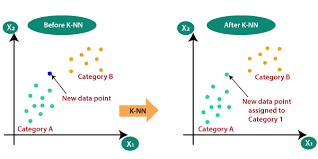

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model
k_neighbor=KNeighborsClassifier()
k_neighbor.fit(x_train,y_train)

In [ ]:
y_predict=k_neighbor.predict(x_test)

In [ ]:
# Compute accuracy on the training set
train_accuracy=k_neighbor.score(x_train,y_train)
print(train_accuracy)
# Compute accuracy on the training set
test_accuracy=k_neighbor.score(x_test,y_test)
print(test_accuracy)

Train accuracy-95%.

Test accuracy-93%.

In [ ]:
#confusion matrix of k_neighbor  
confuse_matrix_k_neighbor  = confusion_matrix(y_test,y_pred)
print(confuse_matrix_k_neighbor)
sns.heatmap(confuse_matrix_k_neighbor,annot=True)

In [ ]:
# Area under ROC curve
roc_auc_score(y_test,y_pred)

#### 2.Hyperparameter Tuning

In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
# In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

In [ ]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x,y)

In [ ]:
knn_cv.best_score_

In [ ]:
knn_cv.best_params_

##### Which hyperparameter optimization technique have you used and why?

Here we used GridSearchCv for improve the accuracy

##### Have you seen any improvement?

**After using Hypermeter tuning we get a better accuracy score and the accuracy is 94%.**

###ML Model - 5 Naive Bayes Classifier

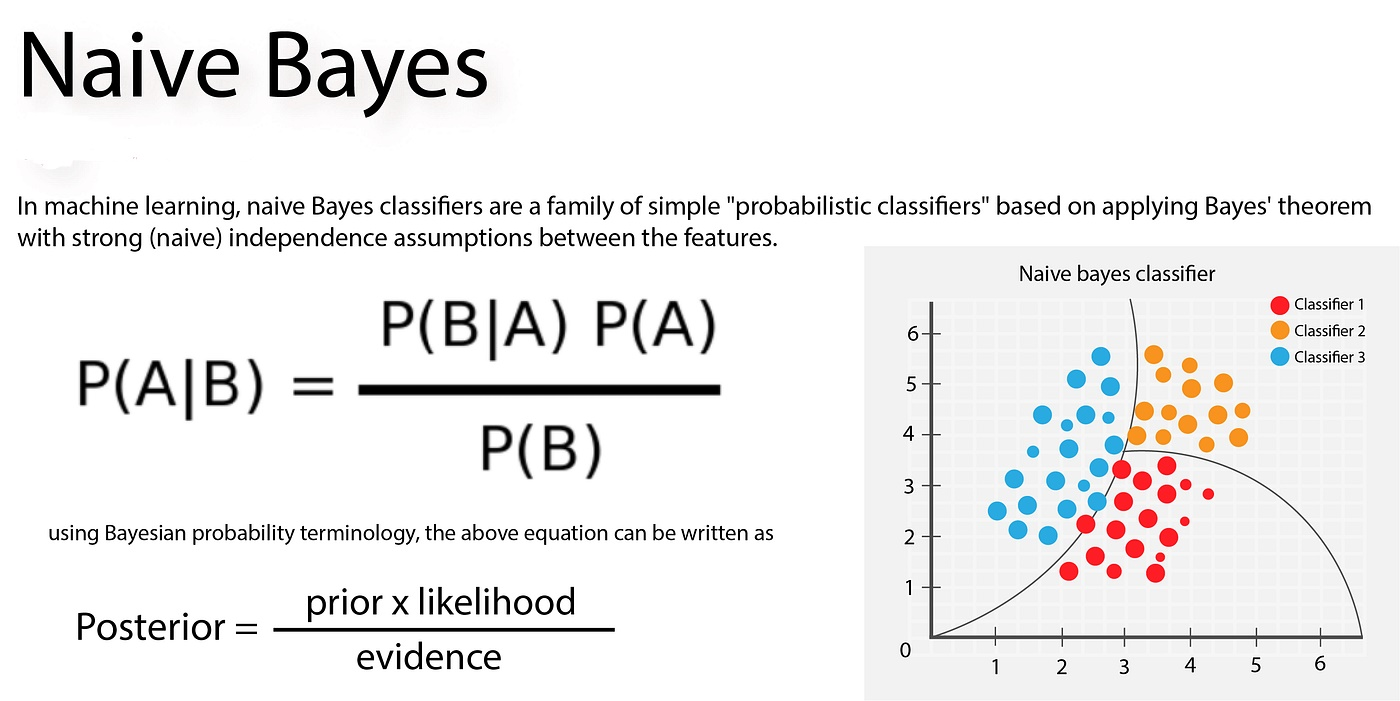

In [ ]:
#Implimanting naive bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)

In [ ]:
#score for naive bayes
naive_bayes.score(x_train,y_train)

In [ ]:
# making predictions on the testing set
y_pred = naive_bayes.predict(x_test)

In [ ]:
y_pred

In [ ]:
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy:", metrics.accuracy_score(y_test, y_pred))

In [ ]:
#confusion matrix
naive_bayes_con_mat = confusion_matrix( y_test,y_pred)
print(naive_bayes_con_mat)
sns.heatmap(naive_bayes_con_mat,annot=True)

91% accuracy with naive bayes classifie

###ML Model - 6 Support Vector Machine

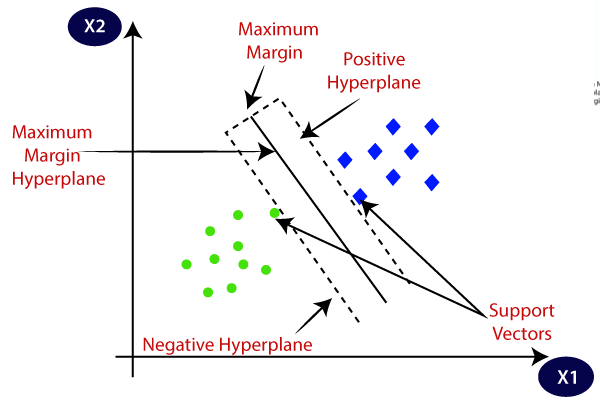

In [ ]:
support_vector = SVC(kernel='linear')
support_vector.fit(x_train, y_train)

In [ ]:
support_vector.score(x_test, y_test)

In [ ]:
y_pred = support_vector.predict(x_test)

In [ ]:
y_pred

In [ ]:
#confusion matrix
support_vector_con_mat = confusion_matrix( y_test,y_pred)
print(support_vector_con_mat)
sns.heatmap(support_vector_con_mat,annot=True)

93% accuracy with support vector machine

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

* I would like to go with Precision.
* model evaluation metrics comparison, we can see that K-Nearest Machine being the model with highest accuracy rate by a very small margin, works best among the experimented models for the given dataset.
---------
* Accuracy : Accuracy will require two inputs (i) actual class labels (ii)predicted class labels. To get the class labels from probabilities( these probabilities will be probabilities of getting a HIT), you can take a threshold of 0.5. Any probability above 0.5 will be labeled as class 1 and anything less than 0.5 will be labeled as class 0.
* Precision : Precision for a label is defined as the number of true positives divided by the number of predicted positives. Report precision in percentages.
* Recall : Recall for a label is defined as the number of true positives divided by the total number of actual positives. Report recall in percentages.
* F1-Score : This is defined as the harmonic mean of precision and recall

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [ ]:
#Creating a function to return all Models Accuracy Score 

def accuracy_of_each_model(model,X_train,X_test):

  #predicting a train datas
  y_train_preds=model.predict(X_train)

  #predicting a test datas
  y_test_preds=model.predict(X_test)

  #storing all training scores
  train_scores=[]

  #storing all test scores
  test_scores=[]
  metrics=['Accuracy_Score','Precsion_Score','Recall_Score','Roc_Auc_Score']

  # Get the accuracy scores
  train_accuracy_score = accuracy_score(y_train,y_train_preds)
  test_accuracy_score = accuracy_score(y_test,y_test_preds)
  
  train_scores.append(train_accuracy_score)
  test_scores.append(test_accuracy_score)
  # Get the precision scores
  train_precision_score = precision_score(y_train,y_train_preds)
  test_precision_score = precision_score(y_test,y_test_preds)

  train_scores.append(train_precision_score)
  test_scores.append(test_precision_score)

  # Get the recall scores
  train_recall_score =recall_score(y_train,y_train_preds)
  test_recall_score =recall_score(y_test,y_test_preds)

  train_scores.append(train_recall_score)
  test_scores.append(test_recall_score)

  # Get the roc_auc scores
  train_roc_auc_score=roc_auc_score(y_train,y_train_preds)
  test_roc_auc_score =roc_auc_score(y_test,y_test_preds)

  train_scores.append(train_roc_auc_score)
  test_scores.append(test_roc_auc_score)

  return train_scores,test_scores,metrics


In [ ]:
models=[log_reg,tree_cv,random_forest_gridcv,knn_cv,naive_bayes,support_vector]
name=['Logistic Regression Model','Decision Tree Model After Hyperparameter Tuning','Random Forest Model After Hyperparameter Tuning','Knn Model After Hyperparameter Tuning','Naive BayesModel','Support vector model']

In [ ]:
for model_ in range(len(models)):
  train_score_,test_score_,metrics_=accuracy_of_each_model(models[model_],x_train,x_test)
  print("-----"*3+f"{name[model_]}"+"-----"*3)
  print("")
  print(pd.DataFrame(data={'Metrics':metrics_,'Train_Score':train_score_,'Test_Score':test_score_}))
  print("")

* From the above snap shot, we can clearly see that for the accuracy and roc auc score is improved for K-Nearest Neighbors.
So, I have chosen K-Nearest Neighbors as the final prediction model which should be deployed for real user interaction.
* All the others model are also perform well in this dataset but I chose K-Nearest Neighbors model.


### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(decision_classify)
# obtain shap values for the first row of the test data
shap_values = explainer.shap_values(x_test)

In [ ]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# obtain shap values for the first row of the test data
shap_values = explainer.shap_values(x_test.iloc[0])
shap.force_plot(explainer.expected_value[0], shap_values[0], x_test.iloc[0]) 

In [ ]:
x_test.mean()

In [ ]:
# Obtain a Scatter Summary Plot 
shap_values = shap.TreeExplainer(decision_classify).shap_values(x_test)
shap.summary_plot(shap_values[0], x_test)

This plot is made of all the dots in the train data. It demonstrates the following information:

* Feature importance: Variables are ranked in descending order.

* Impact: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.

* Original value: Color shows whether that variable is high (in red) or low (in blue) for that observation.

* Red indicates a higher and blue indicates a lower . From the X-axis we can verify the impact (Positive or Negative) for that specific data.

In [ ]:
# Obtain a Bar Summary Plot
shap.summary_plot(shap_values, x_train, plot_type="bar")

A variable importance plot lists the most significant variables in descending order. The top variables contribute more to the model than the bottom ones and thus have high predictive power.

Here, we can see the feature importance for respective classes in a descending order

The most important feature are overall rating and Value for money that contribute to a model's prediction whether a passenger will recommended a particular airline to his/her friends.

# **Conclusion**

The Models used for this Classsification problem are

1. Logistic Regression Model
2. Decision Tree Model
3. Random Forest Model
4. K-Nearest Neighbor Model
5. Naive Bayes
6. Support Vector Machine Model

* We performed Hyperparameter tuning using Gridsearch CV method for Decision Tree Model, Random Forest Model , K-Nearest Neighbor ,Support Vector Machine and Naive Bayes. To increase accuracy and avoid Overfitting Criteria.

* Based on the knowledge of the business and the problem usecase. The Classification metrics of Recall is given first priority , Accuracy is given second priority , and ROC AUC is given third priority.

* We have built classifier models using 6 different types of classifiers and all these are able to give accuracy of more than 90%.* We can conclude that Decission Tree gives the best model.

* model evaluation metrics comparison, we can see that Support Vector Machine being the model with highest accuracy rate by a very small margin, works best among the experimented models for the given dataset.

* The most important feature are overall rating and Value for money that contribute to a model's prediction whether a passenger will recommened a particular airline to his/her friends.

* The classifier models developed can be used to predict passenger referral as it will give airlines ability to identify impactful passengers who can help in bringing more revenues.

* As a result, in order to increase their business or grow, our client must provide excellent cabin service, ground service, food beverage entertainment, and seat comfort.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***